In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
dataframe=pd.read_csv("train.csv")

In [3]:
dataframe.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1.1+ MB


In [5]:
dataframe.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
dataframe["hour"]=pd.DataFrame(dataframe.datetime.apply(lambda x:x.split()[1].split(":")[0]))
dataframe['hour'] = dataframe['hour'].astype('int64')
dataframe["month"]=pd.DataFrame(dataframe.datetime.apply(lambda x:x.split()[0].split("-")[1]))
dataframe['month'] = dataframe['month'].astype('int64')
dataframe["season"]=dataframe.season.map({1:"spring",2:"summer",3:"fall",4:"winter"})
dataframe["weather"]=dataframe.weather.map({1:"Clear",2:"Mist + Cloudy",3:"Light Snow",4:"Heavy Rain"})

In [7]:
dataframe.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month
0,2011-01-01 00:00:00,spring,0,0,Clear,9.84,14.395,81,0,3,13,16,0,1
1,2011-01-01 01:00:00,spring,0,0,Clear,9.02,13.635,80,0,8,32,40,1,1


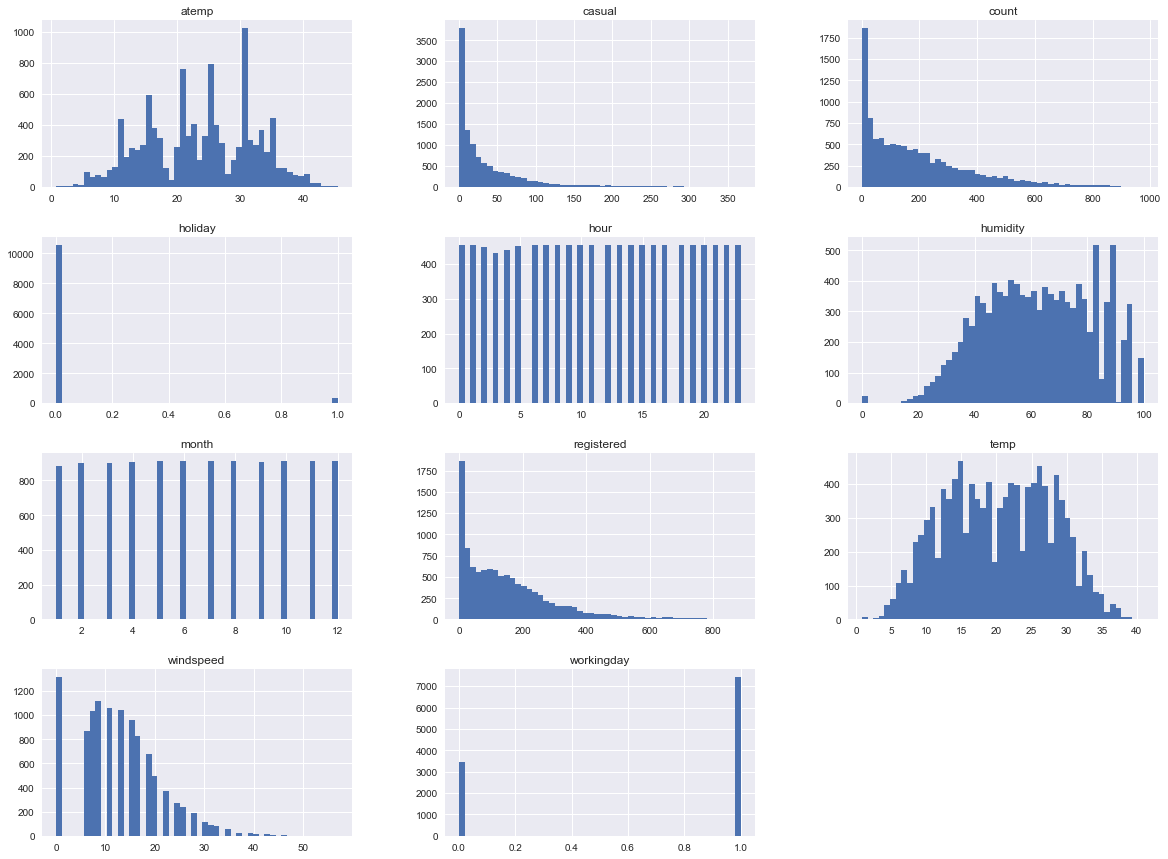

In [8]:
dataframe.hist(bins=50, figsize=(20,15))
plt.show()

Count distribution

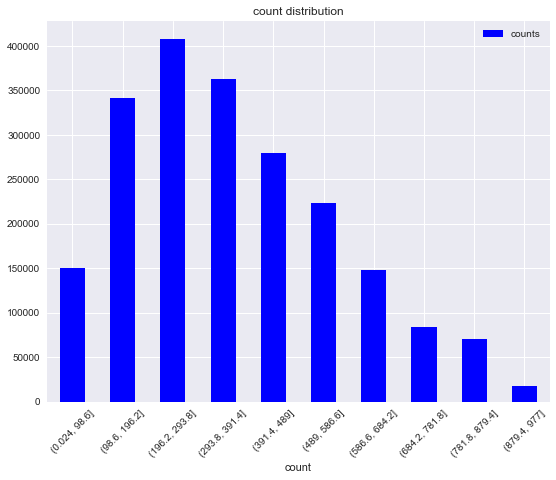

In [9]:
quartiles = pd.cut(dataframe["count"],10)
def get_stats(group):
    return {'counts': group.sum()}

grouped = dataframe["count"].groupby(quartiles)
count_distribution_amount = grouped.apply(get_stats).unstack()
df=pd.DataFrame(count_distribution_amount)
df.plot(kind='bar',figsize=(9, 7),rot=45)
plt.title("count distribution")
plt.show()

Count distribution approximate to normal distributionmoval of outliers 

Removal of outliers

In [10]:
upper_bound=dataframe['count'].mean()+3*dataframe['count'].std()
lower_bound=dataframe['count'].mean()-3*dataframe['count'].std()
dataframe=dataframe[dataframe["count"]<upper_bound]
dataframe=dataframe[dataframe["count"]>lower_bound]

Correlation matrix

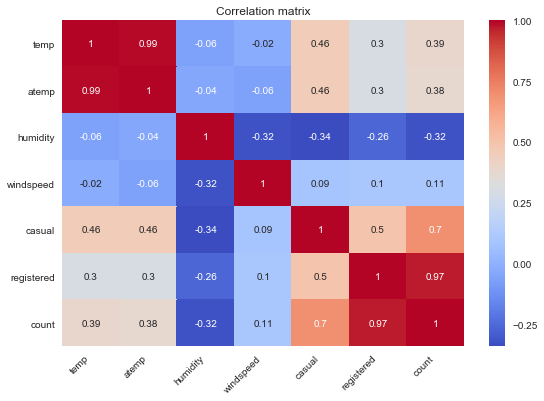

In [11]:
corr_data=dataframe[['temp','atemp','humidity','windspeed','casual','registered','count']]
corr = corr_data.corr()
corr=corr.round(2)
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,annot=True,cmap='coolwarm')
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=360, horizontalalignment='right')
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment='right')
plt.title("Correlation matrix")
plt.show()

Hours statistics with season

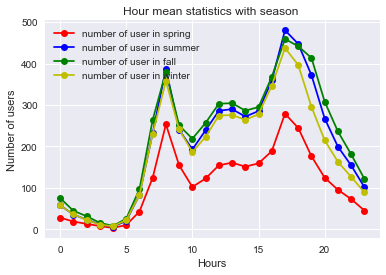

In [12]:
spring_data=dataframe[dataframe["season"]=="spring"]
summer_data=dataframe[dataframe["season"]=="summer"]
fall_data=dataframe[dataframe["season"]=="fall"]
winter_data=dataframe[dataframe["season"]=="winter"]


y1=spring_data.groupby('hour')['count'].mean()
y2=summer_data.groupby('hour')['count'].mean()
y3=fall_data.groupby('hour')['count'].mean()
y4=winter_data.groupby('hour')['count'].mean()  
x1=range(24)
plt.plot(x1,y1,'ro-',x1,y2,'bo-',x1,y3,'go-',x1,y4,'yo-')
plt.title("Hour mean statistics with season ")
plt.legend(["number of user in spring","number of user in summer","number of user in fall","number of user in winter"])
plt.xlabel("Hours")
plt.ylabel("Number of users")
plt.show()

Spring has the fewest users

hours statistics with weather

In [13]:
clear_data=dataframe[dataframe["weather"]=="Clear"]
mist_data=dataframe[dataframe["weather"]=="Mist + Cloudy"]
snow_data=dataframe[dataframe["weather"]=="Light Snow"]
rain_data=dataframe[dataframe["weather"]=="Heavy Rain"]


y1=clear_data.groupby('hour')['count'].mean()
y2=mist_data.groupby('hour')['count'].mean()
y3=snow_data.groupby('hour')['count'].mean()
y4=rain_data.groupby('hour')['count'].mean()  

In [14]:
y4

hour
18    164
Name: count, dtype: int64

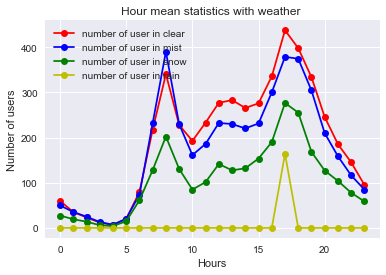

In [15]:
y4_data=[0]*24
y4_data[17]=164
x1=range(24)
y4=pd.DataFrame(y4_data,range(24),)
plt.plot(x1,y1,'ro-',x1,y2,'bo-',x1,y3,'go-',x1,y4,'yo-')
plt.title("Hour mean statistics with weather ")
plt.legend(["number of user in clear","number of user in mist","number of user in snow","number of user in rain"])
plt.xlabel("Hours")
plt.ylabel("Number of users")
plt.show()

The morning peak is at eight in the morning and the evening peak is at seventeen in the evening

month statistics

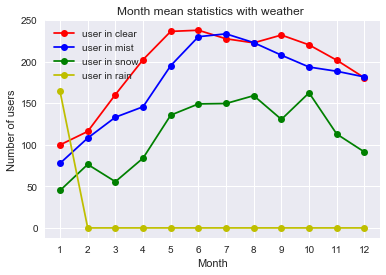

In [16]:
z1=clear_data.groupby('month')['count'].mean()
z2=mist_data.groupby('month')['count'].mean()
z3=snow_data.groupby('month')['count'].mean()
#z4=rain_data.groupby('month')['count'].mean() Only one line
z4_data=[0]*12
z4_data[0]=164
z4=pd.DataFrame(z4_data,range(12),)
x2=range(1,13)

plt.plot(x2,z1,'ro-',x2,z2,'bo-',x2,z3,'go-',x2,z4,'yo-')
plt.title("Month mean statistics with weather ")
plt.legend(["user in clear","user in mist","user in snow","user in rain"])
plt.xlabel("Month")
plt.ylabel("Number of users")
plt.xticks(range(1,13))
plt.show()

January has the fewest users and few people go on a rainy day 

season statistics

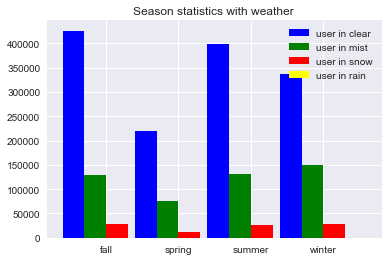

In [17]:
m1=clear_data.groupby('season')['count'].sum()
m2=mist_data.groupby('season')['count'].sum()
m3=snow_data.groupby('season')['count'].sum()
m4=rain_data.groupby('season')['count'].sum()
x3=range(4)
bw=0.3
index=np.arange(4)
plt.bar(index,m1,bw,color='b')
plt.bar(index+bw,m2,bw, color='g')
plt.bar(index+2*bw,m3,bw, color='r')
plt.bar(index+3*bw,m4,bw, color='yellow')
plt.title("Season statistics with weather ")
plt.xticks(index+1.5*bw,['fall','spring','summer','winter'])
plt.legend(["user in clear","user in mist","user in snow","user in rain"])
plt.show()

Summer and fall has more users and there is less users in spring and winter